In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from io import StringIO  
import pydotplus
import graphviz
from sklearn.metrics import mean_squared_error
from IPython.display import Image
from matplotlib import pyplot as plt

In [42]:
data_path = "/Users/yu.zadorozhnaya/Machine-Learning-and-Predictive-Analytics-MSU-/machine_learning_03_data"
data = pd.read_csv(os.path.join(data_path,"test_sample.csv"))
data.head()

,Y,X1,X2,X3
0,0,2,3,5
1,0,2,4,7
2,4,3,2,5
3,0,5,6,3
4,1,2,1,1


In [43]:
Y = data.Y
X = data.drop("Y", axis = 1)
lr = LinearRegression().fit(X, Y)
X.head()

,X1,X2,X3
0,2,3,5
1,2,4,7
2,3,2,5
3,5,6,3
4,2,1,1


In [44]:
def plot_tree(estimator,feature_names):
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data,feature_names=feature_names,
                   rounded=True,filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [46]:
greed = {"ccp_alpha": np.linspace(0.01,0.1,10)}
regr = DecisionTreeRegressor(random_state=0)
# We set negative MSE as scoring function since GridSearchCV maximizes scoring. 
grid_search = GridSearchCV(regr, greed,cv=10, scoring = 'neg_mean_squared_error')
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))



Best: 1.828248 using {'ccp_alpha': 0.05000000000000001}


In [47]:
print ('Linear model CV MSE = ',-np.mean(cross_val_score(lr, X, Y, 
                                        scoring='neg_mean_squared_error',cv=10)))

Linear model CV MSE =  1.805614281832123


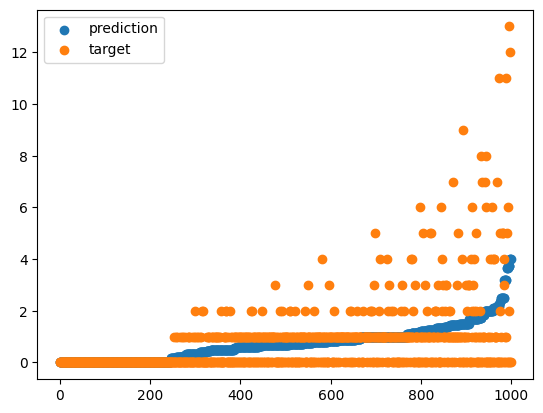

In [48]:
regr = DecisionTreeRegressor(random_state=0,min_samples_leaf=2)
regr.fit(X,Y)
compare = pd.DataFrame({'target':Y,'prediction':regr.predict(X)})
compare = compare.sort_values('prediction').reset_index()
ax = plt.scatter(x=compare.index, y=compare.prediction)
ax1 = plt.scatter(x=compare.index, y=compare.target)
plt.legend([ax,ax1],['prediction','target'])
plt.show()

In [49]:
grid_search = GridSearchCV(regr, greed, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X, Y)

# get optimal ccp_alpha from grid search
optimal_ccp_alpha = 0.05000000000000001

In [50]:
dt_optimal = DecisionTreeRegressor(ccp_alpha=optimal_ccp_alpha, random_state=0)
dt_optimal.fit(X, Y)

# calculate mean squared error of fitted model
y_pred = dt_optimal.predict(X)
mse = mean_squared_error(Y, y_pred)
print('Mean squared error:', mse)


Mean squared error: 1.8244960000000001
